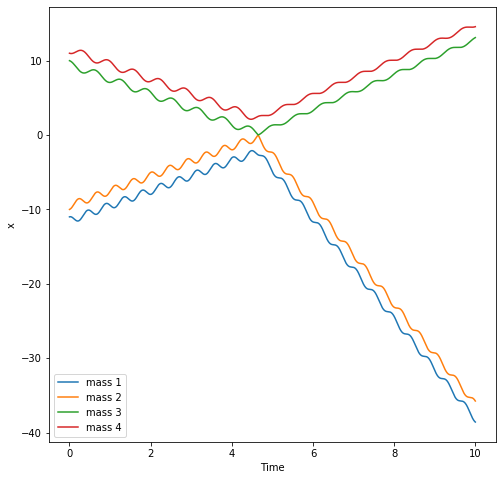

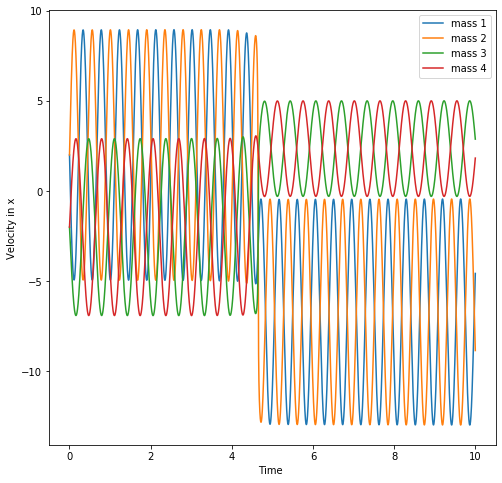

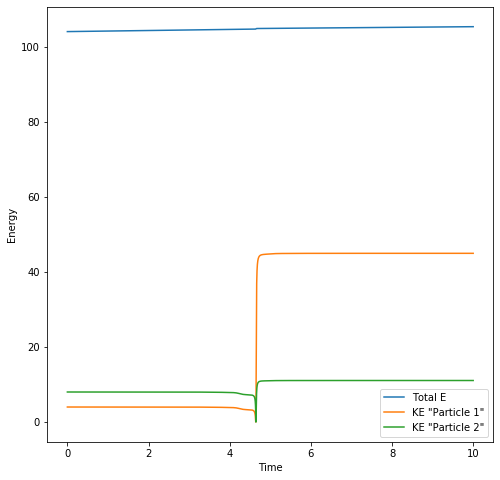

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib

#Define constants
k1 = 100
k2 = 100
q1 = -2
q2 = 2
q3 = 2
q4 = -2
l1 = 2
l2 = 2

m1 = 1
m2 = 1
m3 = 2
m4 = 2

#Define the potential
def Pot(x1, x2, x3, x4):
    temp = 0.5*k1*(x2-x1-l1)**2
    temp += 0.5*k2*(x4-x3-l2)**2
    temp += q1*q2/np.abs(x2-x1)
    temp += q1*q3/np.abs(x3-x1)
    temp += q1*q4/np.abs(x4-x1)
    temp += q2*q3/np.abs(x3-x2)
    temp += q2*q4/np.abs(x4-x2)
    temp += q3*q4/np.abs(x4-x3)
    return temp

#define time and x steps
dt = 0.00001
dx = 1e-9
length = 1000000

#Empty arrays
X1 = np.zeros(length)
X2 = np.zeros(length)
X3 = np.zeros(length)
X4 = np.zeros(length)
V1 = np.zeros(length)
V2 = np.zeros(length)
V3 = np.zeros(length)
V4 = np.zeros(length)
time = np.zeros(length)

#Initial conditions
X1[0] = -11
X2[0] = -10
X3[0] = 10
X4[0] = 11

V1[0] = 2
V2[0] = 2
V3[0] = -2
V4[0] = -2

#calculate the motion
for i in range(len(X1)-1):
    X1[i+1] = X1[i] + V1[i]*dt
    X2[i+1] = X2[i] + V2[i]*dt
    X3[i+1] = X3[i] + V3[i]*dt
    X4[i+1] = X4[i] + V4[i]*dt
    a1 = -1/m1*(Pot(X1[i]+dx,X2[i],X3[i],X4[i])-Pot(X1[i],X2[i],X3[i],X4[i]))/dx
    a2 = -1/m2*(Pot(X1[i],X2[i]+dx,X3[i],X4[i])-Pot(X1[i],X2[i],X3[i],X4[i]))/dx
    a3 = -1/m3*(Pot(X1[i],X2[i],X3[i]+dx,X4[i])-Pot(X1[i],X2[i],X3[i],X4[i]))/dx
    a4 = -1/m4*(Pot(X1[i],X2[i],X3[i],X4[i]+dx)-Pot(X1[i],X2[i],X3[i],X4[i]))/dx
    V1[i+1] = V1[i] + a1*dt
    V2[i+1] = V2[i] + a2*dt
    V3[i+1] = V3[i] + a3*dt
    V4[i+1] = V4[i] + a4*dt
    time[i+1] = time[i] + dt


#Plot
figure(1,figsize=(8,8))
plt.plot(time,X1,label='mass 1')
plt.plot(time,X2,label='mass 2')
plt.plot(time,X3,label='mass 3')
plt.plot(time,X4,label='mass 4')
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.show()

figure(2,figsize=(8,8))
plt.plot(time, V1,label='mass 1')
plt.plot(time, V2,label='mass 2')
plt.plot(time, V3,label='mass 3')
plt.plot(time, V4,label='mass 4')
plt.xlabel('Time ')
plt.ylabel('Velocity in x')
plt.legend()
plt.show()

KE_tot=0.5*m1*V1**2+0.5*m2*V2**2+0.5*m3*V3**2+0.5*m4*V4**2
figure(3,figsize=(8,8))
plt.plot(time,KE_tot+Pot(X1,X2,X3,X4),label='Total E')
plt.plot(time,0.5*(m1+m2)*((V1+V2)/2)**2, label='KE "Particle 1"')
plt.plot(time,0.5*(m3+m4)*((V3+V4)/2)**2,label='KE "Particle 2"')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()